#**EDUCATION ANALYTICS : GRADUATION TRENDS**
##Created by Christeigen Theodore Suhalim

#**Business Problem Understanding**
**Context :**

Dalam lomba Data Competition ISFEST 2022, peserta diminta menyelesaikan sebuah studi kasus mengenai tren waktu dan faktor yang mempengaruhi kelulusan mahasiswa. Peserta akan melatih keterampilan machine learning mereka melalui data yang telah tersedia menggunakan beberapa variabel pada dokumen transkrip nilai mahasiswa dan hasil evaluasi dosen per mata kuliah.

Target

0 = Tidak lulus tepat waktu

1 = lulus tepat waktu

**Problem Statement :**

Penyelesaian studi tepat waktu untuk kelulusan mahasiswa merupakan salah satu indikator yang dapat digunakan untuk mengukur prestasi belajar mahasiswa. Hal ini sejalan dengan penegasan masa studi dalam peraturan Menteri Riset, Teknologi, dan Pendidikan Tinggi Republik Indonesia (Permen. Menristek pasal 16 no.44, tahun 2015). Waktu studi untuk kelulusan mahasiswa tepat waktu menjadi salah satu indikator yang dapat digunakan untuk mengukur performansi studi mahasiswa suatu perguruan tinggi. Perguruan tinggi ingin mengetahui ciri-ciri mahasiswa yang lulus tepat waktu, dan ciri-ciri tersebut dapat menjadi evaluasi pembelajaran untuk perguruan tinggi tersebut.

**Goals :**

Maka berdasarkan permasalahan tersebut, perguruan tinggi ingin memiliki kemampuan untuk memprediksi kemungkinan seorang mahasiswa akan lulus tepat waktu atau tidak, sehingga dapat mengevaluasi pembelajaran yang telah berlaku.

Dan juga, perguruan tinggi ingin mengetahui faktor/variabel apa yang membuat seorang mahasiswa dapat lulus tepat waktu atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam menyusun kurikulum pembelajaran.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan mahasiswa lulus tepat waktu dan mahasiswa tidak lulus tepat waktu.

Kemudian kita akan membangun model klasifikasi yang akan membantu perguruan tinggi untuk dapat memprediksi probabilitas seorang mahasiswa untuk lulus tepat waktu atau tidak.


#**Data Understanding**
Data source : didapat melalui panitia lomba ISFEST 2022 dan tidak boleh disebarluaskan

Note:

*   Dataset tidak seimbang
*   Terdapat null values yang diubah menjadi 0 pada kolom "NILAI", sesuai dengan aturan yang tertera yakni mereka yang tidak memiliki nilai adalah pelaku yang melakukan pelanggaran akademik
*   Setiap baris data merepresentasikan informasi seorang mahasiswa yang sudah menempuh pembelajaran di perguruan tinggi di masa lalu

#**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import missingno
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/Dataset1_TranscriptMahasiswa.csv",sep=";")
df

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B
...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E


In [ ]:
df.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

In [ ]:
df['NILAI'] = df['NILAI'].fillna(0)

In [ ]:
df.loc[df['NILAI'] >= 0, 'GRADE'] = 'E'
df.loc[df['NILAI'] >= 45, 'GRADE'] = 'D'
df.loc[df['NILAI'] >= 55, 'GRADE'] = 'C'  
df.loc[df['NILAI'] >= 60, 'GRADE'] = 'C+' 
df.loc[df['NILAI'] >= 65, 'GRADE'] = 'B-' 
df.loc[df['NILAI'] >= 70, 'GRADE'] = 'B' 
df.loc[df['NILAI'] >= 75, 'GRADE'] = 'B+' 
df.loc[df['NILAI'] >= 80, 'GRADE'] = 'A-'
df.loc[df['NILAI'] >= 85, 'GRADE'] = 'A'

In [ ]:
df.loc[df['GRADE'] == "E", 'bobotnilai'] = 0
df.loc[df['GRADE'] == "D", 'bobotnilai'] = 1
df.loc[df['GRADE'] == "C", 'bobotnilai'] = 2
df.loc[df['GRADE'] == "C+", 'bobotnilai'] = 2.3
df.loc[df['GRADE'] == "B-", 'bobotnilai'] = 2.7
df.loc[df['GRADE'] == "B", 'bobotnilai'] = 3.0
df.loc[df['GRADE'] == "B+", 'bobotnilai'] = 3.3
df.loc[df['GRADE'] == "A-", 'bobotnilai'] = 3.7
df.loc[df['GRADE'] == "A", 'bobotnilai'] = 4

In [ ]:
df

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,bobotnilai
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0
...,...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E,0.0
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E,0.0
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D,1.0
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E,0.0


In [ ]:
IP = df["SKS"] * df["bobotnilai"]
df["IP"] = IP
df

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,bobotnilai,IP
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0,6.0
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0,9.0
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0,8.0
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0,6.0
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E,0.0,0.0
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E,0.0,0.0
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D,1.0,2.0
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E,0.0,0.0


In [ ]:
df.loc[df['GRADE'] != "D", 'dum_grade'] = 0
df.loc[df['GRADE'] != "E", 'dum_grade'] = 0
df.loc[df['GRADE'] == "D", 'dum_grade'] = 1
df.loc[df['GRADE'] == "E", 'dum_grade'] = 1

In [ ]:
df.nunique()

NIM           770
ANGKATAN        9
SEMESTER       28
KODE_MK       142
NAMA_MK       175
SKS             4
NILAI         101
GRADE           9
bobotnilai      9
IP             27
dum_grade       2
dtype: int64

In [ ]:
df.shape

(30870, 11)

In [ ]:
databaru = df[["NIM","SKS","IP","dum_grade"]]
databaru

,NIM,SKS,IP,dum_grade
0,10110310002,3,6.0,0.0
1,10110310002,3,9.0,0.0
2,10110310002,4,8.0,0.0
3,10110310002,3,6.0,0.0
4,10110310002,3,9.0,0.0
...,...,...,...,...
30865,33849,3,0.0,1.0
30866,33849,3,0.0,1.0
30867,33849,2,2.0,1.0
30868,33849,4,0.0,1.0


In [ ]:
NIM = databaru.groupby("NIM").sum()
print(NIM)

             SKS     IP  dum_grade
NIM                               
8429         145  474.5        1.0
8455         136  416.2        2.0
8481         127  313.6        7.0
8631         145  519.3        0.0
8684         145  512.1        0.0
...          ...    ...        ...
14110310095  145  469.9        2.0
14110310098  145  464.1        1.0
14110310101  138  438.4        0.0
14110310102  133  362.2        3.0
14110310105  127  365.5        1.0

[770 rows x 3 columns]


In [ ]:
print(type(NIM)) 

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_NIM = NIM.reset_index()
df_NIM   

,NIM,SKS,IP,dum_grade
0,8429,145,474.5,1.0
1,8455,136,416.2,2.0
2,8481,127,313.6,7.0
3,8631,145,519.3,0.0
4,8684,145,512.1,0.0
...,...,...,...,...
765,14110310095,145,469.9,2.0
766,14110310098,145,464.1,1.0
767,14110310101,138,438.4,0.0
768,14110310102,133,362.2,3.0


In [ ]:
IPK = df_NIM["IP"] / df_NIM["SKS"]
df_NIM["IPK"] = IPK
df_NIM

,NIM,SKS,IP,dum_grade,IPK
0,8429,145,474.5,1.0,3.272414
1,8455,136,416.2,2.0,3.060294
2,8481,127,313.6,7.0,2.469291
3,8631,145,519.3,0.0,3.581379
4,8684,145,512.1,0.0,3.531724
...,...,...,...,...,...
765,14110310095,145,469.9,2.0,3.240690
766,14110310098,145,464.1,1.0,3.200690
767,14110310101,138,438.4,0.0,3.176812
768,14110310102,133,362.2,3.0,2.723308


Syarat kelulusan :
1.	Sudah menyelesaikan 144 SKS.
2.	Tidak ada nilai D, E, dan F pada setiap mata kuliah. (*dengan asumsi, jika terdapat nilai D, E, dan F berarti mengulang semester, sehingga lebih dari 8 semester*)
3.  IPK min 2,5

In [ ]:
df_NIM.loc[((df_NIM['SKS'] < 144) | (df_NIM['IPK'] < 2.5) | (df_NIM["dum_grade"] > 0)), 'lulus_4_tahun'] = "TIDAK" 
df_NIM.loc[((df_NIM['SKS'] >= 144) & (df_NIM['IPK'] >= 2.5) & (df_NIM["dum_grade"] <= 0)), 'lulus_4_tahun'] = "YA"

In [ ]:
df_NIM = df_NIM[["NIM","SKS","IPK","dum_grade","lulus_4_tahun"]]
df_NIM

,NIM,SKS,IPK,dum_grade,lulus_4_tahun
0,8429,145,3.272414,1.0,TIDAK
1,8455,136,3.060294,2.0,TIDAK
2,8481,127,2.469291,7.0,TIDAK
3,8631,145,3.581379,0.0,YA
4,8684,145,3.531724,0.0,YA
...,...,...,...,...,...
765,14110310095,145,3.240690,2.0,TIDAK
766,14110310098,145,3.200690,1.0,TIDAK
767,14110310101,138,3.176812,0.0,TIDAK
768,14110310102,133,2.723308,3.0,TIDAK


In [ ]:
df_NIM.loc[df_NIM['lulus_4_tahun'] == "YA" , 'lulus_4_tahun'] = 1
df_NIM.loc[df_NIM['lulus_4_tahun'] == "TIDAK", 'lulus_4_tahun'] = 0
df_NIM

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,NIM,SKS,IPK,dum_grade,lulus_4_tahun
0,8429,145,3.272414,1.0,0
1,8455,136,3.060294,2.0,0
2,8481,127,2.469291,7.0,0
3,8631,145,3.581379,0.0,1
4,8684,145,3.531724,0.0,1
...,...,...,...,...,...
765,14110310095,145,3.240690,2.0,0
766,14110310098,145,3.200690,1.0,0
767,14110310101,138,3.176812,0.0,0
768,14110310102,133,2.723308,3.0,0


#**Exploritory Data Analysis (EDA)**

In [ ]:
df_stats = df_NIM[["SKS","dum_grade","IPK"]]
df_stats.describe()

,SKS,dum_grade,IPK
count,770.000000,770.000000,770.000000
mean,113.780519,2.337662,2.943956
std,48.195553,3.416134,0.608217
min,40.000000,0.000000,0.000000
25%,82.000000,0.000000,2.673277
50%,134.000000,1.000000,3.034729
75%,145.000000,3.000000,3.340000
max,290.000000,22.000000,4.000000


In [ ]:
df_stats.shape

(770, 3)

In [ ]:
df_stats.nunique()

SKS           80
dum_grade     20
IPK          732
dtype: int64

In [ ]:
df_final = df_NIM.drop(columns = 'NIM')

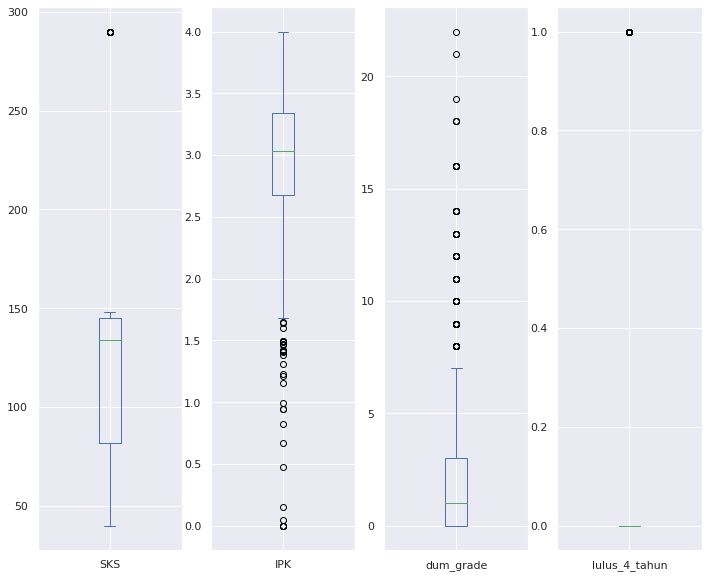

In [ ]:
df_final.plot(kind='box', subplots=True, layout=(1,5), sharex=False, figsize=(15,10))
plt.show()

In [ ]:
Q1 = df_final.quantile(q=.25)
Q3 = df_final.quantile(q=.75)
IQR = df_final.apply(stats.iqr)
df_final = df_final[~((df_final < (Q1-1.5*IQR)) | (df_final > (Q3+1.5*IQR))).any(axis=1)]
df_final.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,SKS,IPK,dum_grade
count,683.000000,683.000000,683.000000
mean,112.825769,3.069120,1.430454
std,41.276236,0.428615,1.645863
min,40.000000,1.677500,0.000000
25%,82.000000,2.791798,0.000000
50%,143.000000,3.095181,1.000000
75%,145.000000,3.372341,2.000000
max,148.000000,4.000000,7.000000


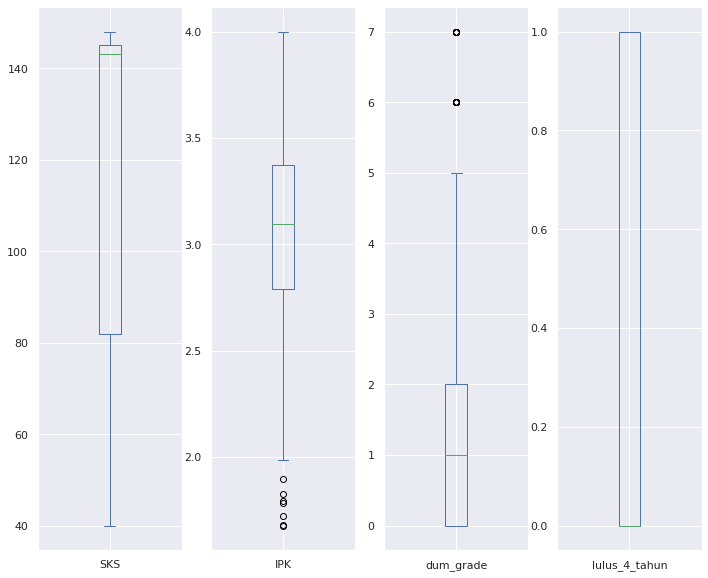

In [ ]:
df_final.plot(kind='box', subplots=True, layout=(1,5), sharex=False, figsize=(15,10))
plt.show()

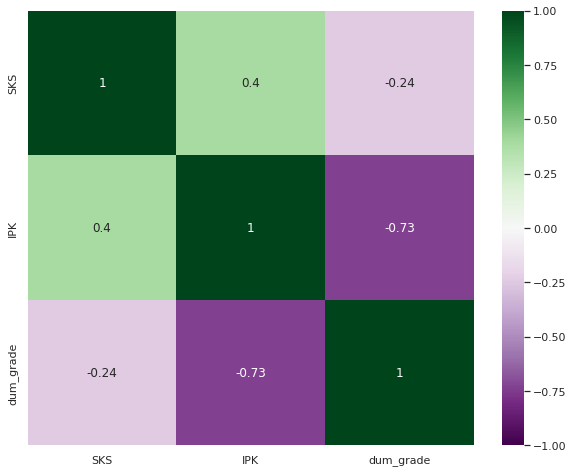

In [ ]:
import numpy as np
sns.set(rc={'figure.figsize':(10,8)}) 
sns.heatmap(df_final.corr(method='pearson').round(3), annot=True, cmap='PRGn', vmin=-1, vmax=1)

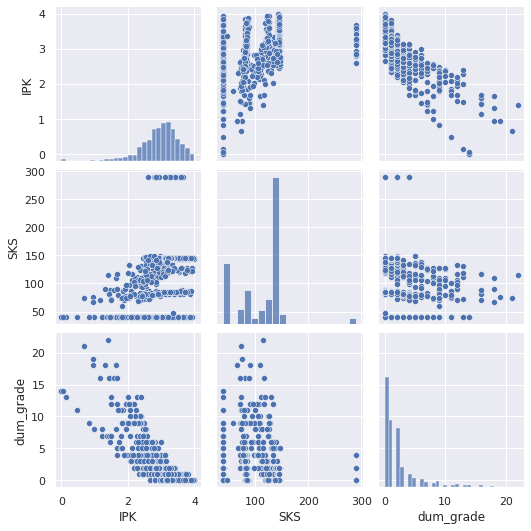

In [ ]:
df_stats = df_stats[["IPK","SKS", "dum_grade"]]
sns.pairplot(df_stats)

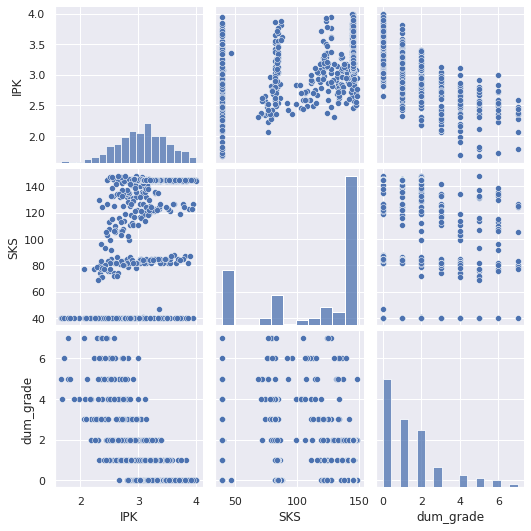

In [ ]:
df_clean = df_final.drop(columns = "lulus_4_tahun")
df_clean = df_clean[["IPK", "SKS", "dum_grade"]]
sns.pairplot(df_clean)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


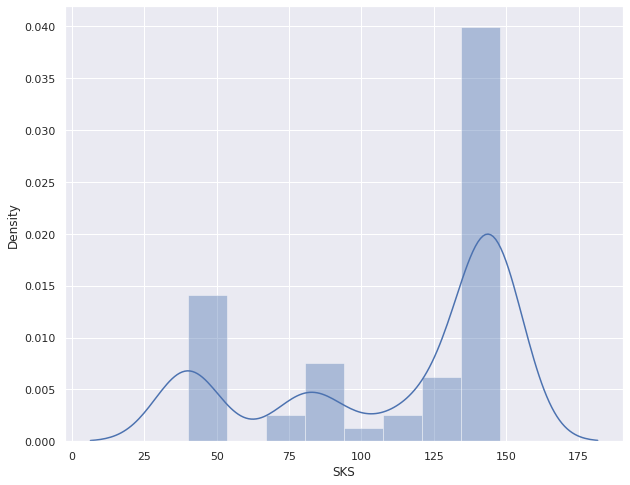

In [ ]:
sns.distplot(df_final["SKS"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


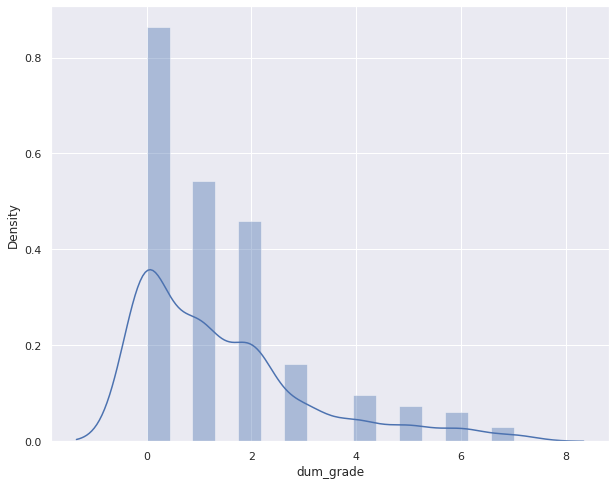

In [ ]:
sns.distplot(df_final["dum_grade"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


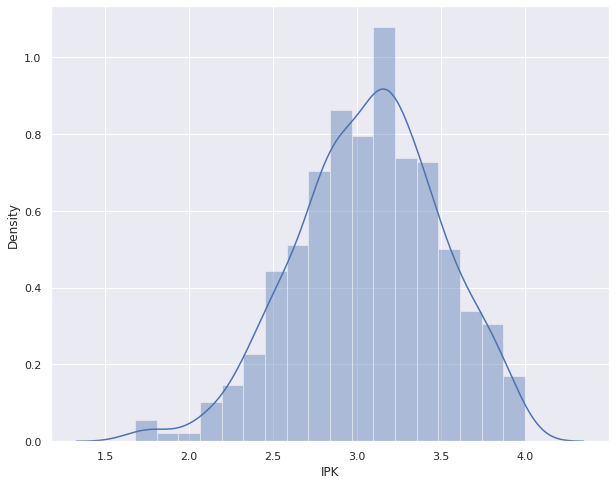

In [ ]:
sns.distplot(df_final["IPK"])

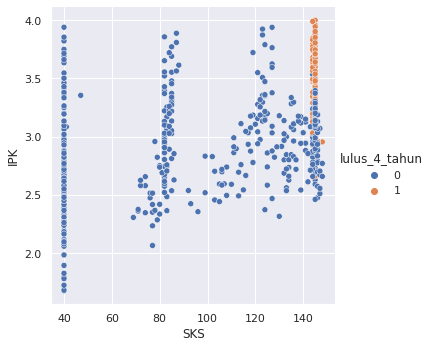

In [ ]:
sns.relplot( x = "SKS", y = "IPK", hue = "lulus_4_tahun", data = df_final)

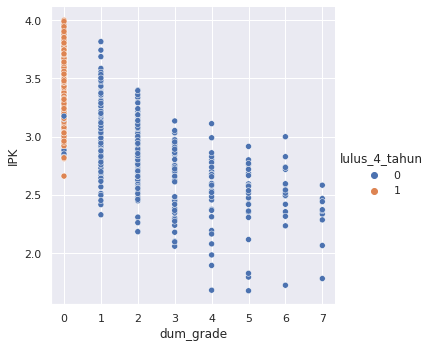

In [ ]:
sns.relplot( x = "dum_grade", y = "IPK", hue = "lulus_4_tahun", data = df_final)

In [ ]:
df_final

,SKS,IPK,dum_grade,lulus_4_tahun
0,145,3.272414,1.0,0
1,136,3.060294,2.0,0
2,127,2.469291,7.0,0
3,145,3.581379,0.0,1
4,145,3.531724,0.0,1
...,...,...,...,...
765,145,3.240690,2.0,0
766,145,3.200690,1.0,0
767,138,3.176812,0.0,0
768,133,2.723308,3.0,0


#**Handling Imbalance Data**

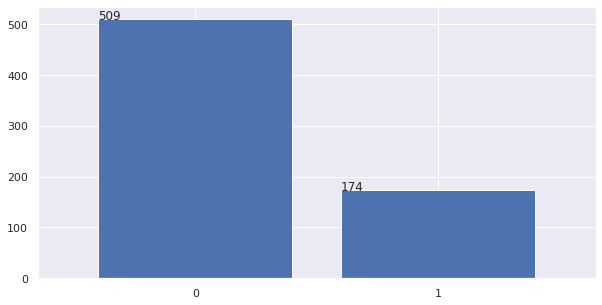

In [ ]:
ax = df_final['lulus_4_tahun'].value_counts().plot(figsize=(10,5), kind='bar', rot=0, width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

In [ ]:
# df_final = df_final.drop(columns =['Unnamed: 0'])
x = df_final.drop(columns = ["lulus_4_tahun"]).values
y = df_final["lulus_4_tahun"].values
y = y.astype('int')

In [ ]:
x

array([[145.        ,   3.27241379,   1.        ],
       [136.        ,   3.06029412,   2.        ],
       [127.        ,   2.46929134,   7.        ],
       ...,
       [138.        ,   3.17681159,   0.        ],
       [133.        ,   2.72330827,   3.        ],
       [127.        ,   2.87795276,   1.        ]])

In [ ]:
#Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(x,y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 509, 1: 174})
Resample dataset shape Counter({0: 509, 1: 509})


In [ ]:
#Random Under Sampling
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(x,y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 509, 1: 174})
Resample dataset shape Counter({0: 174, 1: 174})


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 509, 1: 174})
Resample dataset shape Counter({0: 509, 1: 509})


In [ ]:
# imbalance data
models = [GaussianNB(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), XGBClassifier(), lgb.LGBMClassifier()]
names = ["Naive Bayes", "Decision Tree", "SVM","Random Forest","Logistic Regression","KNN", " XGBoost", "LightGBM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy","precision","recall","f1","roc_auc"]:
        print(score, ":", cross_val_score(model, x, y,scoring=score, cv=10).mean())
    print(" ")

Naive Bayes
accuracy : 0.9985507246376812
precision : 1.0
recall : 0.9944444444444445
f1 : 0.9971428571428571
roc_auc : 1.0
 
Decision Tree
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
SVM
accuracy : 0.6982097186700768


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

precision : 0.026153846153846156
recall : 0.1
f1 : 0.041463414634146344
roc_auc : 0.9424452133794695
 
Random Forest
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
Logistic Regression
accuracy : 0.9985294117647058
precision : 0.9944444444444445
recall : 1.0
f1 : 0.9971428571428571
roc_auc : 1.0
 
KNN
accuracy : 0.9985507246376812
precision : 1.0
recall : 0.9944444444444445
f1 : 0.9971428571428571
roc_auc : 1.0
 
 XGBoost
accuracy : 0.9985294117647058
precision : 0.9944444444444445
recall : 1.0
f1 : 0.9971428571428571
roc_auc : 1.0
 
LightGBM
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 


In [ ]:
#Random Over Sampling
models = [GaussianNB(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), XGBClassifier(), lgb.LGBMClassifier()]
names = ["Naive Bayes", "Decision Tree", "SVM","Random Forest","Logistic Regression","KNN", " XGBoost", "LightGBM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy","precision","recall","f1","roc_auc"]:
        print(score, ":", cross_val_score(model, x_ros, y_ros,scoring=score, cv=10).mean())
    print(" ")

Naive Bayes
accuracy : 0.9960590176664725
precision : 1.0
recall : 0.9920784313725491
f1 : 0.9959789856536674
roc_auc : 1.0
 
Decision Tree
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
SVM
accuracy : 0.8118714812657736
precision : 0.7907353316109041
recall : 1.0
f1 : 0.8660727199197483
roc_auc : 0.9438954248366013
 
Random Forest
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
Logistic Regression
accuracy : 0.9990099009900991
precision : 0.9980392156862745
recall : 1.0
f1 : 0.9990099009900989
roc_auc : 1.0
 
KNN
accuracy : 0.996039603960396
precision : 0.9925925925925926
recall : 1.0
f1 : 0.9961538461538462
roc_auc : 0.9997254901960785
 
 XGBoost
accuracy : 0.9990099009900991
precision : 0.9980392156862745
recall : 1.0
f1 : 0.9990099009900989
roc_auc : 1.0
 
LightGBM
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 


In [ ]:
#Random Under Sampling
models = [GaussianNB(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), XGBClassifier(), lgb.LGBMClassifier()]
names = ["Naive Bayes", "Decision Tree", "SVM","Random Forest","Logistic Regression","KNN", " XGBoost", "LightGBM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy","precision","recall","f1","roc_auc"]:
        print(score, ":", cross_val_score(model, x_rus, y_rus,scoring=score, cv=10).mean())
    print(" ")

Naive Bayes
accuracy : 0.9971428571428571
precision : 1.0
recall : 0.9941176470588236
f1 : 0.9969696969696968
roc_auc : 1.0
 
Decision Tree
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
SVM
accuracy : 0.7959663865546218
precision : 0.7118425704730051
recall : 1.0
f1 : 0.8312404915692296
roc_auc : 0.8938292964244521
 
Random Forest
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
Logistic Regression
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
KNN
accuracy : 0.9971428571428571
precision : 1.0
recall : 0.9941176470588236
f1 : 0.9969696969696968
roc_auc : 1.0
 
 XGBoost
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
LightGBM
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 


In [ ]:
#SMOTE
models = [GaussianNB(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), XGBClassifier(), lgb.LGBMClassifier()]
names = ["Naive Bayes", "Decision Tree", "SVM","Random Forest","Logistic Regression","KNN", " XGBoost", "LightGBM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy","precision","recall","f1","roc_auc"]:
        print(score, ":", cross_val_score(model, x_smote, y_smote,scoring=score, cv=10).mean())
    print(" ")

Naive Bayes
accuracy : 0.9990196078431373
precision : 1.0
recall : 0.9980392156862745
f1 : 0.9990099009900991
roc_auc : 1.0
 
Decision Tree
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
SVM
accuracy : 0.8118714812657736
precision : 0.7907353316109041
recall : 1.0
f1 : 0.8660727199197483
roc_auc : 0.9420984236831987
 
Random Forest
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
Logistic Regression
accuracy : 0.9990099009900991
precision : 0.9980392156862745
recall : 1.0
f1 : 0.9990099009900989
roc_auc : 1.0
 
KNN
accuracy : 0.9950592118035333
precision : 0.9925925925925926
recall : 0.9980392156862745
f1 : 0.9951637471439451
roc_auc : 1.0
 
 XGBoost
accuracy : 0.9990099009900991
precision : 0.9980392156862745
recall : 1.0
f1 : 0.9990099009900989
roc_auc : 1.0
 
LightGBM
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 


Dari ketiga cara yang digunakan untuk mengatasi ketidakseimbangan data, digunakan 3 metode yakni Random Over Sampling (ROS), Random Under Sampling (RUS), dan juga SMOTE. Ketiga metode tersebut kemudian diuji melalui nilai accuracy, precission, recall, f1, dan roc_auc. Kemudian imbalance data, ROS, RUS, dan SMOTE dibandingkan dan ROS dan SMOTE memiliki nilai-nilai yang lebih tinggi dari cara yang lain. Oleh sebab itu, ketika kita melakukan modelling kita akan menggunakan ROS ataupun SMOTE.

# **Identify the Best Parameters (Hyperparameter Tuning)**

## Hyperparameter Tuning Naive Bays

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

a = np.logspace(0,-9, num=10)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
naivebayes = GaussianNB()
naivebayes.fit(x_smote,y_smote)

params_NB = {'var_smoothing': a}

gs_NB = GridSearchCV(naivebayes,param_grid=params_NB, cv=cv_method,verbose=1, scoring='accuracy')

#Data_transformed = PowerTransformer().fit_transform(x_smote)

gs_NB.fit(x_smote, y_smote)

gs_NB.best_params_

Fitting 15 folds for each of 10 candidates, totalling 150 fits


{'var_smoothing': 1e-05}

## Hyperparameter Tuning Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(x_smote,y_smote)

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5],
            "min_samples_split":[2,3,4,5],
            "min_samples_leaf":[1,2,3],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3],
            "min_impurity_decrease":[0.0,0.1,0.2,0.3,0.5],
            "ccp_alpha":[0.0,0.1,0.2,0.3,0.5]}
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv= 10)
tuning_model.fit(x_smote,y_smote)
tuning_model.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

## Hyperparameter Tuning SVM

In [ ]:
param_grid = {'C': [1, 10, 100, 1000],
			'gamma': [0.1,0.2,0.3,0.4,0.5,1],
			'kernel': ['rbf','linear']}

grid = GridSearchCV(SVC(), param_grid, cv = 10)

grid.fit(x_smote, y_smote)
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## Hyperparameter Tuning Random forest

In [ ]:
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 10)
grid_results = grid.fit(x_smote, y_smote)

print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
# results_df = pd.DataFrame(grid_results.cv_results_)
# results_df

Best: [1. 1. 1. 1. 1. 1. 1. 1. 1.], using {'max_depth': 2, 'n_estimators': 64}


## Hyperparameter Tuning Log Regression

In [ ]:
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.001]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(x_smote, y_smote)

print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")

Best score on training data: 0.9990099009900991 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is n

## Hyperparameter Tuning KNN

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(x_smote,y_smote)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


## Hyperparameter XGBoost

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 0)

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
0.45751633986928103
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
1.0
SCORE:
0.45751633986928103
SCORE:
0.9379084967320261
SCORE:
0.9379084967320261
SCORE:
0.9379084967320261
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
0.9379084967320261
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
1.0
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
0.45751633986928103
SCORE:
0.9379084967320261
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
1.0
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
0.9379084967320261
SCORE:
0.45751633986928103
SCORE:
1.0
SCORE:
0.93790849

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.662082614713631, 'gamma': 4.278220307012134, 'max_depth': 3.0, 'min_child_weight': 1.0, 'reg_alpha': 94.0, 'reg_lambda': 0.7530434236189977}


## Hypertuning Parameter LightGBM

In [ ]:
model = lgb.LGBMRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 4, 5]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='r2')
grid_result = grid_search.fit(x_smote, y_smote)
print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Accuracy score: 1.000000 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


#**Modelling**

In [ ]:
models = [GaussianNB(var_smoothing = 1e-05), 
          DecisionTreeClassifier(ccp_alpha = 0.0, max_depth = 3, min_impurity_decrease = 0.0, min_samples_leaf = 1, min_samples_split = 2, min_weight_fraction_leaf = 0.0, splitter = 'best'), 
          SVC(C = 10, gamma = 0.1, kernel = 'rbf'),
          RandomForestClassifier(max_depth = 2, n_estimators = 64),
          LogisticRegression(), 
          KNeighborsClassifier(leaf_size = 1, p = 1, n_neighbors = 1), 
          XGBClassifier(), 
          lgb.LGBMClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.5)
          ]
names = ["Naive Bayes", "Decision Tree", "SVM","Random Forest","Logistic Regression", "KNN", "XGBoost", "LightGBM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy","precision","recall","f1","roc_auc"]:
        print(score, ":", cross_val_score(model, x_smote, y_smote,scoring=score, cv=10).mean())
    print(" ")

Naive Bayes
accuracy : 0.9990196078431373
precision : 1.0
recall : 0.9980392156862745
f1 : 0.9990099009900991
roc_auc : 1.0
 
Decision Tree
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
SVM
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
Random Forest
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
Logistic Regression
accuracy : 0.9990099009900991
precision : 0.9980392156862745
recall : 1.0
f1 : 0.9990099009900989
roc_auc : 1.0
 
KNN
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 
XGBoost
accuracy : 0.9990099009900991
precision : 0.9980392156862745
recall : 1.0
f1 : 0.9990099009900989
roc_auc : 1.0
 
LightGBM
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0
 


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=1, stratify=y_smote)

In [ ]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [ ]:
data = pd.DataFrame(x_train)
target = pd.DataFrame(y_train)

## Evaluation Metrics With Oversampling

In [ ]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []
train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('model',lgb.LGBMClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.5))
    ])
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(x_smote, y_smote, X_val, Y_val, estimator)
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [ ]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
